In [1]:
from simulation_lab import SimulationLab
import chart_studio.plotly as py
import plotly_keys as pk
import chart_studio
chart_studio.tools.set_credentials_file(username=pk.username, api_key=pk.key)
import numpy as np
np.random.seed(13)

<div style="text-align: center;font-size: 14px;">
<h1>Simulación de modelos para problemas de</h1>
<h1>Bernoulli Multi-Armed-Bandit</h1>
</div>

En esta notebook se verán 4 casos de simulaciones para los siguientes 3 métodos distintos enfocados en atacar un problema de Multi Armed Bandit bernoulli:
* Epsilon-Greedy sin y con epsilon decay (epsilon = epsilon/n para cada paso n)
* Upper Confidence Bound (UCB)
* Thompson Sampling

Presentaremos 4 casos con distintas características para evaluar los modelos frente a distintos contextos, realizando para cada uno de ellos<br>100 repeticiones de 1000 iteraciones, promediando luego los valores obtenidos en cada repetición.

---

# Caso 1
En este caso tenemos 3 máquinas con diferencias marcadas en sus probabilidades y con extremos alejados **(p0=.3, p1=.5, p2=.9)**.

In [2]:
sl = SimulationLab(
    actual_probs=[.3, .5, .9],
    repetitions=100,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:05<08:42,  5.28s/it]

Saving repetition 0...


  2%|▏         | 2/100 [00:10<08:44,  5.35s/it]

Saving repetition 1...


  3%|▎         | 3/100 [00:15<08:32,  5.29s/it]

Saving repetition 2...


  4%|▍         | 4/100 [00:21<08:22,  5.23s/it]

Saving repetition 3...


  5%|▌         | 5/100 [00:26<08:21,  5.27s/it]

Saving repetition 4...


  6%|▌         | 6/100 [00:31<08:13,  5.25s/it]

Saving repetition 5...


  7%|▋         | 7/100 [00:36<08:06,  5.23s/it]

Saving repetition 6...


  8%|▊         | 8/100 [00:41<07:58,  5.20s/it]

Saving repetition 7...


  9%|▉         | 9/100 [00:47<07:53,  5.20s/it]

Saving repetition 8...


 10%|█         | 10/100 [00:52<07:49,  5.22s/it]

Saving repetition 9...


 11%|█         | 11/100 [00:58<08:08,  5.49s/it]

Saving repetition 10...


 12%|█▏        | 12/100 [01:04<08:05,  5.52s/it]

Saving repetition 11...


 13%|█▎        | 13/100 [01:09<07:59,  5.51s/it]

Saving repetition 12...


 14%|█▍        | 14/100 [01:14<07:51,  5.48s/it]

Saving repetition 13...


 15%|█▌        | 15/100 [01:20<07:47,  5.50s/it]

Saving repetition 14...


 16%|█▌        | 16/100 [01:26<07:47,  5.57s/it]

Saving repetition 15...


 17%|█▋        | 17/100 [01:31<07:40,  5.55s/it]

Saving repetition 16...


 18%|█▊        | 18/100 [01:37<07:32,  5.52s/it]

Saving repetition 17...


 19%|█▉        | 19/100 [01:43<07:35,  5.63s/it]

Saving repetition 18...


 20%|██        | 20/100 [01:48<07:23,  5.55s/it]

Saving repetition 19...


 21%|██        | 21/100 [01:53<07:13,  5.49s/it]

Saving repetition 20...


 22%|██▏       | 22/100 [01:59<07:03,  5.43s/it]

Saving repetition 21...


 23%|██▎       | 23/100 [02:04<07:02,  5.49s/it]

Saving repetition 22...


 24%|██▍       | 24/100 [02:10<06:53,  5.45s/it]

Saving repetition 23...


 25%|██▌       | 25/100 [02:15<06:45,  5.40s/it]

Saving repetition 24...


 26%|██▌       | 26/100 [02:20<06:34,  5.32s/it]

Saving repetition 25...


 27%|██▋       | 27/100 [02:25<06:28,  5.32s/it]

Saving repetition 26...


 28%|██▊       | 28/100 [02:31<06:21,  5.30s/it]

Saving repetition 27...


 29%|██▉       | 29/100 [02:36<06:16,  5.30s/it]

Saving repetition 28...


 30%|███       | 30/100 [02:41<06:12,  5.32s/it]

Saving repetition 29...


 31%|███       | 31/100 [02:47<06:09,  5.36s/it]

Saving repetition 30...


 32%|███▏      | 32/100 [02:52<06:05,  5.37s/it]

Saving repetition 31...


 33%|███▎      | 33/100 [02:57<05:58,  5.36s/it]

Saving repetition 32...


 34%|███▍      | 34/100 [03:03<05:53,  5.35s/it]

Saving repetition 33...


 35%|███▌      | 35/100 [03:08<05:54,  5.45s/it]

Saving repetition 34...


 36%|███▌      | 36/100 [03:14<05:56,  5.58s/it]

Saving repetition 35...


 37%|███▋      | 37/100 [03:20<05:49,  5.54s/it]

Saving repetition 36...


 38%|███▊      | 38/100 [03:25<05:41,  5.50s/it]

Saving repetition 37...


 39%|███▉      | 39/100 [03:31<05:32,  5.46s/it]

Saving repetition 38...


 40%|████      | 40/100 [03:36<05:25,  5.42s/it]

Saving repetition 39...


 41%|████      | 41/100 [03:41<05:17,  5.39s/it]

Saving repetition 40...


 42%|████▏     | 42/100 [03:46<05:10,  5.36s/it]

Saving repetition 41...


 43%|████▎     | 43/100 [03:52<05:07,  5.39s/it]

Saving repetition 42...


 44%|████▍     | 44/100 [03:57<05:04,  5.43s/it]

Saving repetition 43...


 45%|████▌     | 45/100 [04:03<04:56,  5.40s/it]

Saving repetition 44...


 46%|████▌     | 46/100 [04:08<04:50,  5.37s/it]

Saving repetition 45...


 47%|████▋     | 47/100 [04:14<04:48,  5.44s/it]

Saving repetition 46...


 48%|████▊     | 48/100 [04:19<04:47,  5.54s/it]

Saving repetition 47...


 49%|████▉     | 49/100 [04:25<04:39,  5.48s/it]

Saving repetition 48...


 50%|█████     | 50/100 [04:30<04:30,  5.42s/it]

Saving repetition 49...


 51%|█████     | 51/100 [04:35<04:23,  5.38s/it]

Saving repetition 50...


 52%|█████▏    | 52/100 [04:41<04:16,  5.35s/it]

Saving repetition 51...


 53%|█████▎    | 53/100 [04:46<04:11,  5.36s/it]

Saving repetition 52...


 54%|█████▍    | 54/100 [04:51<04:06,  5.35s/it]

Saving repetition 53...


 55%|█████▌    | 55/100 [04:57<04:02,  5.38s/it]

Saving repetition 54...


 56%|█████▌    | 56/100 [05:02<03:57,  5.39s/it]

Saving repetition 55...


 57%|█████▋    | 57/100 [05:07<03:50,  5.36s/it]

Saving repetition 56...


 58%|█████▊    | 58/100 [05:13<03:45,  5.37s/it]

Saving repetition 57...


 59%|█████▉    | 59/100 [05:18<03:40,  5.38s/it]

Saving repetition 58...


 60%|██████    | 60/100 [05:24<03:42,  5.55s/it]

Saving repetition 59...


 61%|██████    | 61/100 [05:30<03:33,  5.48s/it]

Saving repetition 60...


 62%|██████▏   | 62/100 [05:35<03:27,  5.45s/it]

Saving repetition 61...


 63%|██████▎   | 63/100 [05:40<03:20,  5.41s/it]

Saving repetition 62...


 64%|██████▍   | 64/100 [05:46<03:17,  5.48s/it]

Saving repetition 63...


 65%|██████▌   | 65/100 [05:51<03:10,  5.45s/it]

Saving repetition 64...


 66%|██████▌   | 66/100 [05:57<03:04,  5.43s/it]

Saving repetition 65...


 67%|██████▋   | 67/100 [06:02<02:58,  5.41s/it]

Saving repetition 66...


 68%|██████▊   | 68/100 [06:07<02:52,  5.41s/it]

Saving repetition 67...


 69%|██████▉   | 69/100 [06:13<02:47,  5.40s/it]

Saving repetition 68...


 70%|███████   | 70/100 [06:18<02:44,  5.48s/it]

Saving repetition 69...


 71%|███████   | 71/100 [06:24<02:38,  5.48s/it]

Saving repetition 70...


 72%|███████▏  | 72/100 [06:30<02:36,  5.60s/it]

Saving repetition 71...


 73%|███████▎  | 73/100 [06:35<02:29,  5.54s/it]

Saving repetition 72...


 74%|███████▍  | 74/100 [06:41<02:24,  5.56s/it]

Saving repetition 73...


 75%|███████▌  | 75/100 [06:46<02:17,  5.50s/it]

Saving repetition 74...


 76%|███████▌  | 76/100 [06:52<02:10,  5.45s/it]

Saving repetition 75...


 77%|███████▋  | 77/100 [06:57<02:04,  5.43s/it]

Saving repetition 76...


 78%|███████▊  | 78/100 [07:03<02:01,  5.54s/it]

Saving repetition 77...


 79%|███████▉  | 79/100 [07:08<01:54,  5.47s/it]

Saving repetition 78...


 80%|████████  | 80/100 [07:13<01:48,  5.43s/it]

Saving repetition 79...


 81%|████████  | 81/100 [07:19<01:42,  5.40s/it]

Saving repetition 80...


 82%|████████▏ | 82/100 [07:24<01:36,  5.38s/it]

Saving repetition 81...


 83%|████████▎ | 83/100 [07:29<01:31,  5.39s/it]

Saving repetition 82...


 84%|████████▍ | 84/100 [07:35<01:28,  5.53s/it]

Saving repetition 83...


 85%|████████▌ | 85/100 [07:41<01:21,  5.46s/it]

Saving repetition 84...


 86%|████████▌ | 86/100 [07:46<01:16,  5.43s/it]

Saving repetition 85...


 87%|████████▋ | 87/100 [07:51<01:10,  5.40s/it]

Saving repetition 86...


 88%|████████▊ | 88/100 [07:57<01:04,  5.39s/it]

Saving repetition 87...


 89%|████████▉ | 89/100 [08:02<00:59,  5.39s/it]

Saving repetition 88...


 90%|█████████ | 90/100 [08:07<00:53,  5.36s/it]

Saving repetition 89...


 91%|█████████ | 91/100 [08:13<00:48,  5.36s/it]

Saving repetition 90...


 92%|█████████▏| 92/100 [08:18<00:42,  5.36s/it]

Saving repetition 91...


 93%|█████████▎| 93/100 [08:23<00:37,  5.36s/it]

Saving repetition 92...


 94%|█████████▍| 94/100 [08:29<00:32,  5.35s/it]

Saving repetition 93...


 95%|█████████▌| 95/100 [08:34<00:26,  5.35s/it]

Saving repetition 94...


 96%|█████████▌| 96/100 [08:40<00:22,  5.51s/it]

Saving repetition 95...


 97%|█████████▋| 97/100 [08:45<00:16,  5.45s/it]

Saving repetition 96...


 98%|█████████▊| 98/100 [08:51<00:10,  5.42s/it]

Saving repetition 97...


 99%|█████████▉| 99/100 [08:56<00:05,  5.42s/it]

Saving repetition 98...


100%|██████████| 100/100 [09:01<00:00,  5.42s/it]


Saving repetition 99...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:07<00:00,  1.91s/it]

Success!


### Selección de máquinas

Como podemos ver en el gráfico de abajo, a medida que avanzan las iteraciones, los modelos de **UCB** y **Thompson Sampling** son los que parecieran funcionar de una forma más eficiente. En cuanto a los modelos de **e-greedy**, vemos que si bien el que tiene epsilon-decay no es el que selecciona la <br>máquina óptima una mayor cantidad de veces, si es el que selecciona las 2 mejores una mayor cantidad de veces, mientras que el que no tiene epsilon-decay gasta más intentos en la peor opción.

In [3]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso1', sharing='public')

<div style="text-align: center;font-size: 14px;">
<i>egT = epsilon-greedy con epsilon-decay | egF = epsilon-greedy sin epsilon-decay</i>
</div>

### Regret(n)/n

Cuando pasamos a analizar el comportamiento del Regret/n en función de n, vemos que, efectivamente, **UCB** y **Thompson sampling** son los modelos que más se acercan al 0 a medida que n tiene a infinito, siendo **Thompson sampling** el obtiene valores más bajos. En cuanto a los modelos **e-greedy** vemos que ambos parecieran converger al mismo valor a medida que n crece.

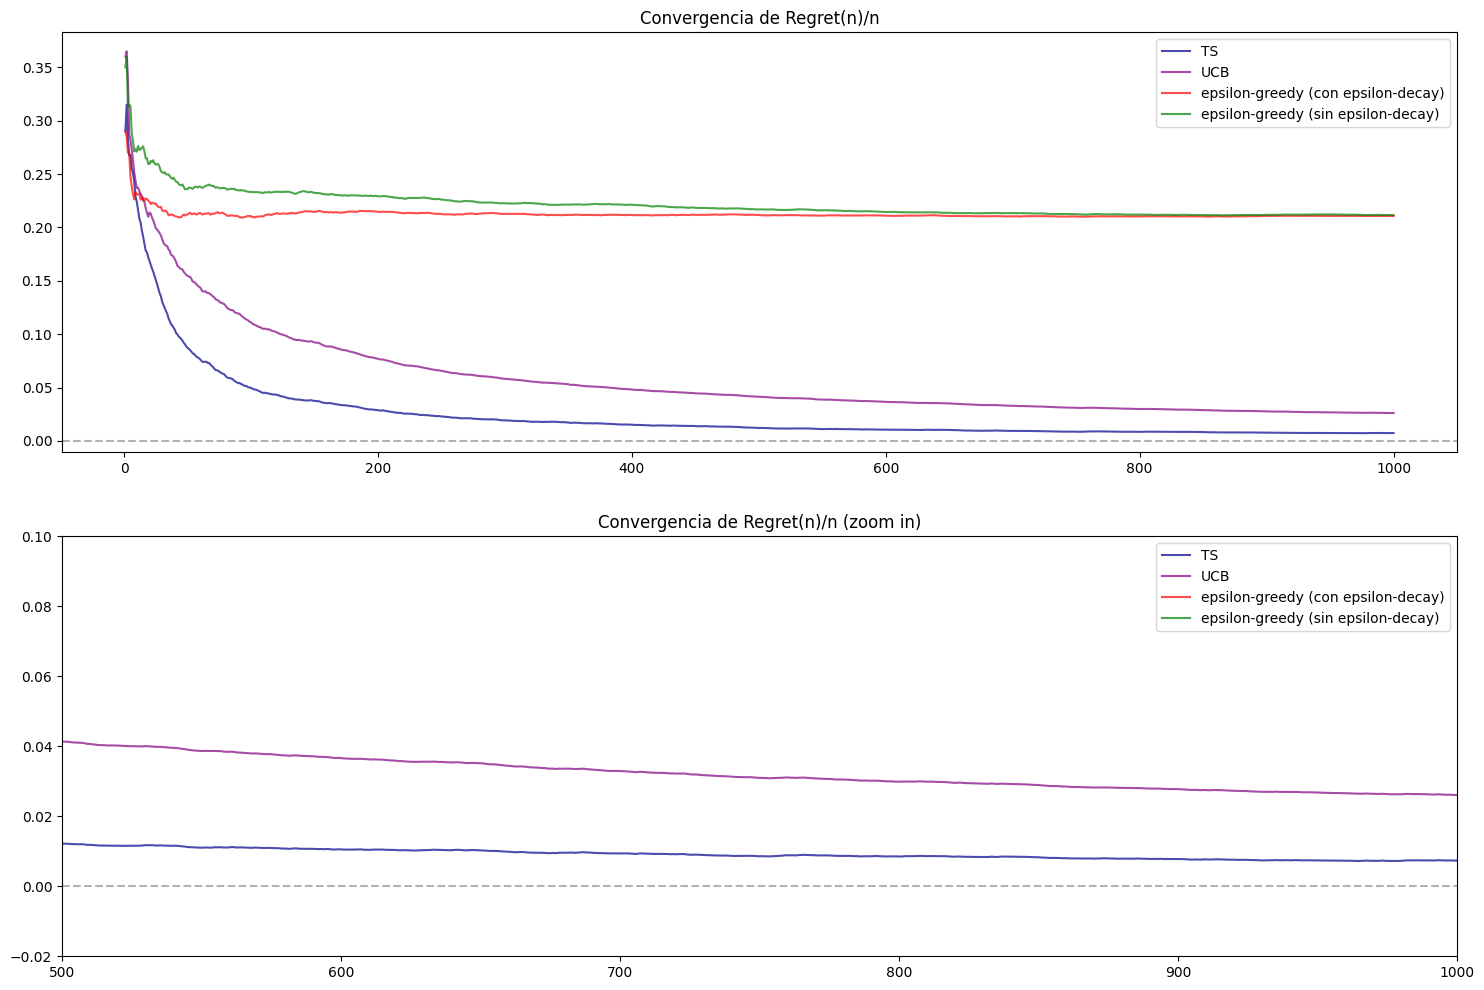

In [4]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

Podemos ver que esto se condice en el último gráfico, donde comparamos la velocidad de crecimiento del Regret/n contra $\sqrt{n}$, ya que los modelos de **UCB** y **Thompson sampling** son los 2 que están más cerca de crecer a nivel $\sqrt{n}$, siendo **Thomspon sampling** el de mejor performance por crecer a una velocidad<br>aun menor

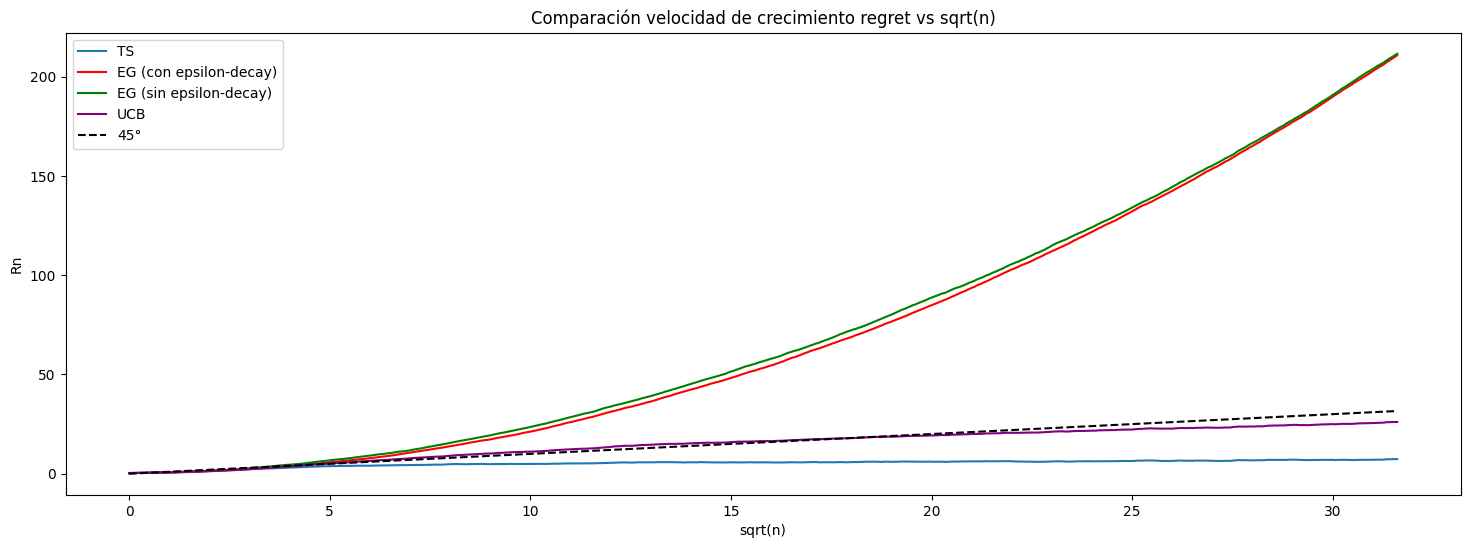

In [5]:
sl.plot_log_comparison()

### **Conclución caso 1**

Podríamos concluir en que, para casos en donde las probabilidades subyacentes son fácilmente separables, **Thompson Sampling** resulta el mejor modelo a utilizar.

---

# Caso 2
En este caso tenemos 3 máquinas con diferencias pequeñas en sus probabilidades y con los extremos cercanos **(p0=.5, p1=.52, p2=.54)**.

In [6]:
sl = SimulationLab(
    actual_probs=[.5, .52, .54],
    repetitions=100,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


  1%|          | 1/100 [00:05<08:30,  5.15s/it]

Saving repetition 0...


  2%|▏         | 2/100 [00:10<08:18,  5.09s/it]

Saving repetition 1...


  3%|▎         | 3/100 [00:15<08:07,  5.03s/it]

Saving repetition 2...


  4%|▍         | 4/100 [00:20<08:15,  5.16s/it]

Saving repetition 3...


  5%|▌         | 5/100 [00:25<08:19,  5.25s/it]

Saving repetition 4...


  6%|▌         | 6/100 [00:31<08:11,  5.22s/it]

Saving repetition 5...


  7%|▋         | 7/100 [00:36<08:03,  5.20s/it]

Saving repetition 6...


  8%|▊         | 8/100 [00:41<07:57,  5.19s/it]

Saving repetition 7...


  9%|▉         | 9/100 [00:46<07:53,  5.20s/it]

Saving repetition 8...


 10%|█         | 10/100 [00:51<07:49,  5.21s/it]

Saving repetition 9...


 11%|█         | 11/100 [00:57<07:43,  5.21s/it]

Saving repetition 10...


 12%|█▏        | 12/100 [01:02<07:40,  5.24s/it]

Saving repetition 11...


 13%|█▎        | 13/100 [01:07<07:30,  5.18s/it]

Saving repetition 12...


 14%|█▍        | 14/100 [01:12<07:28,  5.22s/it]

Saving repetition 13...


 15%|█▌        | 15/100 [01:17<07:19,  5.17s/it]

Saving repetition 14...


 16%|█▌        | 16/100 [01:23<07:18,  5.22s/it]

Saving repetition 15...


 17%|█▋        | 17/100 [01:28<07:22,  5.33s/it]

Saving repetition 16...


 18%|█▊        | 18/100 [01:34<07:16,  5.33s/it]

Saving repetition 17...


 19%|█▉        | 19/100 [01:39<07:04,  5.24s/it]

Saving repetition 18...


 20%|██        | 20/100 [01:44<07:02,  5.28s/it]

Saving repetition 19...


 21%|██        | 21/100 [01:49<06:52,  5.22s/it]

Saving repetition 20...


 22%|██▏       | 22/100 [01:54<06:46,  5.22s/it]

Saving repetition 21...


 23%|██▎       | 23/100 [02:00<06:47,  5.29s/it]

Saving repetition 22...


 24%|██▍       | 24/100 [02:06<07:10,  5.66s/it]

Saving repetition 23...


 25%|██▌       | 25/100 [02:12<07:12,  5.77s/it]

Saving repetition 24...


 26%|██▌       | 26/100 [02:19<07:18,  5.92s/it]

Saving repetition 25...


 27%|██▋       | 27/100 [02:25<07:19,  6.02s/it]

Saving repetition 26...


 28%|██▊       | 28/100 [02:30<06:54,  5.76s/it]

Saving repetition 27...


 29%|██▉       | 29/100 [02:35<06:39,  5.63s/it]

Saving repetition 28...


 30%|███       | 30/100 [02:41<06:32,  5.61s/it]

Saving repetition 29...


 31%|███       | 31/100 [02:46<06:19,  5.49s/it]

Saving repetition 30...


 32%|███▏      | 32/100 [02:51<06:06,  5.39s/it]

Saving repetition 31...


 33%|███▎      | 33/100 [02:56<05:57,  5.34s/it]

Saving repetition 32...


 34%|███▍      | 34/100 [03:02<05:47,  5.27s/it]

Saving repetition 33...


 35%|███▌      | 35/100 [03:07<05:42,  5.28s/it]

Saving repetition 34...


 36%|███▌      | 36/100 [03:12<05:37,  5.28s/it]

Saving repetition 35...


 37%|███▋      | 37/100 [03:17<05:30,  5.24s/it]

Saving repetition 36...


 38%|███▊      | 38/100 [03:22<05:23,  5.21s/it]

Saving repetition 37...


 39%|███▉      | 39/100 [03:28<05:16,  5.20s/it]

Saving repetition 38...


 40%|████      | 40/100 [03:33<05:11,  5.19s/it]

Saving repetition 39...


 41%|████      | 41/100 [03:38<05:05,  5.18s/it]

Saving repetition 40...


 42%|████▏     | 42/100 [03:43<05:07,  5.30s/it]

Saving repetition 41...


 43%|████▎     | 43/100 [03:49<05:03,  5.33s/it]

Saving repetition 42...


 44%|████▍     | 44/100 [03:54<04:54,  5.25s/it]

Saving repetition 43...


 45%|████▌     | 45/100 [03:59<04:48,  5.25s/it]

Saving repetition 44...


 46%|████▌     | 46/100 [04:05<04:54,  5.45s/it]

Saving repetition 45...


 47%|████▋     | 47/100 [04:10<04:45,  5.39s/it]

Saving repetition 46...


 48%|████▊     | 48/100 [04:16<04:37,  5.34s/it]

Saving repetition 47...


 49%|████▉     | 49/100 [04:21<04:28,  5.27s/it]

Saving repetition 48...


 50%|█████     | 50/100 [04:26<04:24,  5.29s/it]

Saving repetition 49...


 51%|█████     | 51/100 [04:31<04:19,  5.30s/it]

Saving repetition 50...


 52%|█████▏    | 52/100 [04:37<04:13,  5.29s/it]

Saving repetition 51...


 53%|█████▎    | 53/100 [04:42<04:06,  5.25s/it]

Saving repetition 52...


 54%|█████▍    | 54/100 [04:47<04:03,  5.30s/it]

Saving repetition 53...


 55%|█████▌    | 55/100 [04:53<04:03,  5.42s/it]

Saving repetition 54...


 56%|█████▌    | 56/100 [04:58<03:56,  5.37s/it]

Saving repetition 55...


 57%|█████▋    | 57/100 [05:03<03:48,  5.31s/it]

Saving repetition 56...


 58%|█████▊    | 58/100 [05:09<03:43,  5.32s/it]

Saving repetition 57...


 59%|█████▉    | 59/100 [05:14<03:34,  5.23s/it]

Saving repetition 58...


 60%|██████    | 60/100 [05:19<03:29,  5.23s/it]

Saving repetition 59...


 61%|██████    | 61/100 [05:24<03:22,  5.20s/it]

Saving repetition 60...


 62%|██████▏   | 62/100 [05:29<03:17,  5.21s/it]

Saving repetition 61...


 63%|██████▎   | 63/100 [05:34<03:12,  5.20s/it]

Saving repetition 62...


 64%|██████▍   | 64/100 [05:39<03:05,  5.17s/it]

Saving repetition 63...


 65%|██████▌   | 65/100 [05:45<03:00,  5.16s/it]

Saving repetition 64...


 66%|██████▌   | 66/100 [05:50<02:55,  5.16s/it]

Saving repetition 65...


 67%|██████▋   | 67/100 [05:56<02:56,  5.35s/it]

Saving repetition 66...


 68%|██████▊   | 68/100 [06:01<02:50,  5.32s/it]

Saving repetition 67...


 69%|██████▉   | 69/100 [06:06<02:44,  5.30s/it]

Saving repetition 68...


 70%|███████   | 70/100 [06:11<02:36,  5.23s/it]

Saving repetition 69...


 71%|███████   | 71/100 [06:16<02:31,  5.21s/it]

Saving repetition 70...


 72%|███████▏  | 72/100 [06:22<02:25,  5.21s/it]

Saving repetition 71...


 73%|███████▎  | 73/100 [06:27<02:21,  5.23s/it]

Saving repetition 72...


 74%|███████▍  | 74/100 [06:32<02:15,  5.21s/it]

Saving repetition 73...


 75%|███████▌  | 75/100 [06:37<02:09,  5.18s/it]

Saving repetition 74...


 76%|███████▌  | 76/100 [06:42<02:04,  5.17s/it]

Saving repetition 75...


 77%|███████▋  | 77/100 [06:47<01:59,  5.18s/it]

Saving repetition 76...


 78%|███████▊  | 78/100 [06:53<01:54,  5.19s/it]

Saving repetition 77...


 79%|███████▉  | 79/100 [06:58<01:49,  5.20s/it]

Saving repetition 78...


 80%|████████  | 80/100 [07:04<01:48,  5.45s/it]

Saving repetition 79...


 81%|████████  | 81/100 [07:09<01:41,  5.37s/it]

Saving repetition 80...


 82%|████████▏ | 82/100 [07:14<01:35,  5.31s/it]

Saving repetition 81...


 83%|████████▎ | 83/100 [07:20<01:30,  5.31s/it]

Saving repetition 82...


 84%|████████▍ | 84/100 [07:25<01:24,  5.31s/it]

Saving repetition 83...


 85%|████████▌ | 85/100 [07:30<01:19,  5.28s/it]

Saving repetition 84...


 86%|████████▌ | 86/100 [07:35<01:13,  5.23s/it]

Saving repetition 85...


 87%|████████▋ | 87/100 [07:40<01:07,  5.18s/it]

Saving repetition 86...


 88%|████████▊ | 88/100 [07:45<01:02,  5.17s/it]

Saving repetition 87...


 89%|████████▉ | 89/100 [07:51<00:57,  5.22s/it]

Saving repetition 88...


 90%|█████████ | 90/100 [07:56<00:52,  5.26s/it]

Saving repetition 89...


 91%|█████████ | 91/100 [08:01<00:46,  5.21s/it]

Saving repetition 90...


 92%|█████████▏| 92/100 [08:07<00:43,  5.41s/it]

Saving repetition 91...


 93%|█████████▎| 93/100 [08:12<00:37,  5.35s/it]

Saving repetition 92...


 94%|█████████▍| 94/100 [08:17<00:31,  5.30s/it]

Saving repetition 93...


 95%|█████████▌| 95/100 [08:23<00:26,  5.26s/it]

Saving repetition 94...


 96%|█████████▌| 96/100 [08:28<00:21,  5.25s/it]

Saving repetition 95...


 97%|█████████▋| 97/100 [08:33<00:15,  5.22s/it]

Saving repetition 96...


 98%|█████████▊| 98/100 [08:38<00:10,  5.24s/it]

Saving repetition 97...


 99%|█████████▉| 99/100 [08:43<00:05,  5.22s/it]

Saving repetition 98...


100%|██████████| 100/100 [08:49<00:00,  5.29s/it]


Saving repetition 99...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]

Success!


### Selección de máquinas

* Como se observa en el gráfico de abajo, si bien al comienzo todos los modelos performan de forma similar, al rededor del paso de iteración n°100 podemos ver como el **Thompson Sampling** comienza a detectar que la máquina óptima es la n°2 (p=.54), para luego centrarse en ella y así convertirse en el método que pareciera funcionar mejor para este caso<br>
* En cuanto al resto de los métodos, podemos ver que el **e-greedy** no performa bien, esto encuentra su lógica en la cercanía que seteamos entre las probabilidades reales subyasentes de las 3 máquinas, como este método tiende a seleccionar la máquina con mayor esperanza empírica, es posible que, por efecto del azar, el mismo detecte como óptima una máquina que no lo es. Si a esto le sumamos<br>un epsilon-decay, vemos como el modelo performa aun peor, ya que realiza una apuesta mucho más fuerte sobre la máquina equivocada.<br>
* Por último, el modelo de **UCB** pareciera detectar que la opción óptima es jugar a la máquina n°2 (p=.54), pero no logra darle el peso necesario, por lo que selecciona las máquinas menos<br>importantes una mayor cantidad de veces.

In [7]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso2', sharing='public')

<div style="text-align: center;font-size: 14px;">
<i>egT = epsilon-greedy con epsilon-decay | egF = epsilon-greedy sin epsilon-decay</i>
</div>

### Regret(n)/n

Al avanzar en el análisis vemos que los valores de todos los modelos se encuentran juntos, siendo **Thompson sampling** el que obtiene un Rn/n menor.

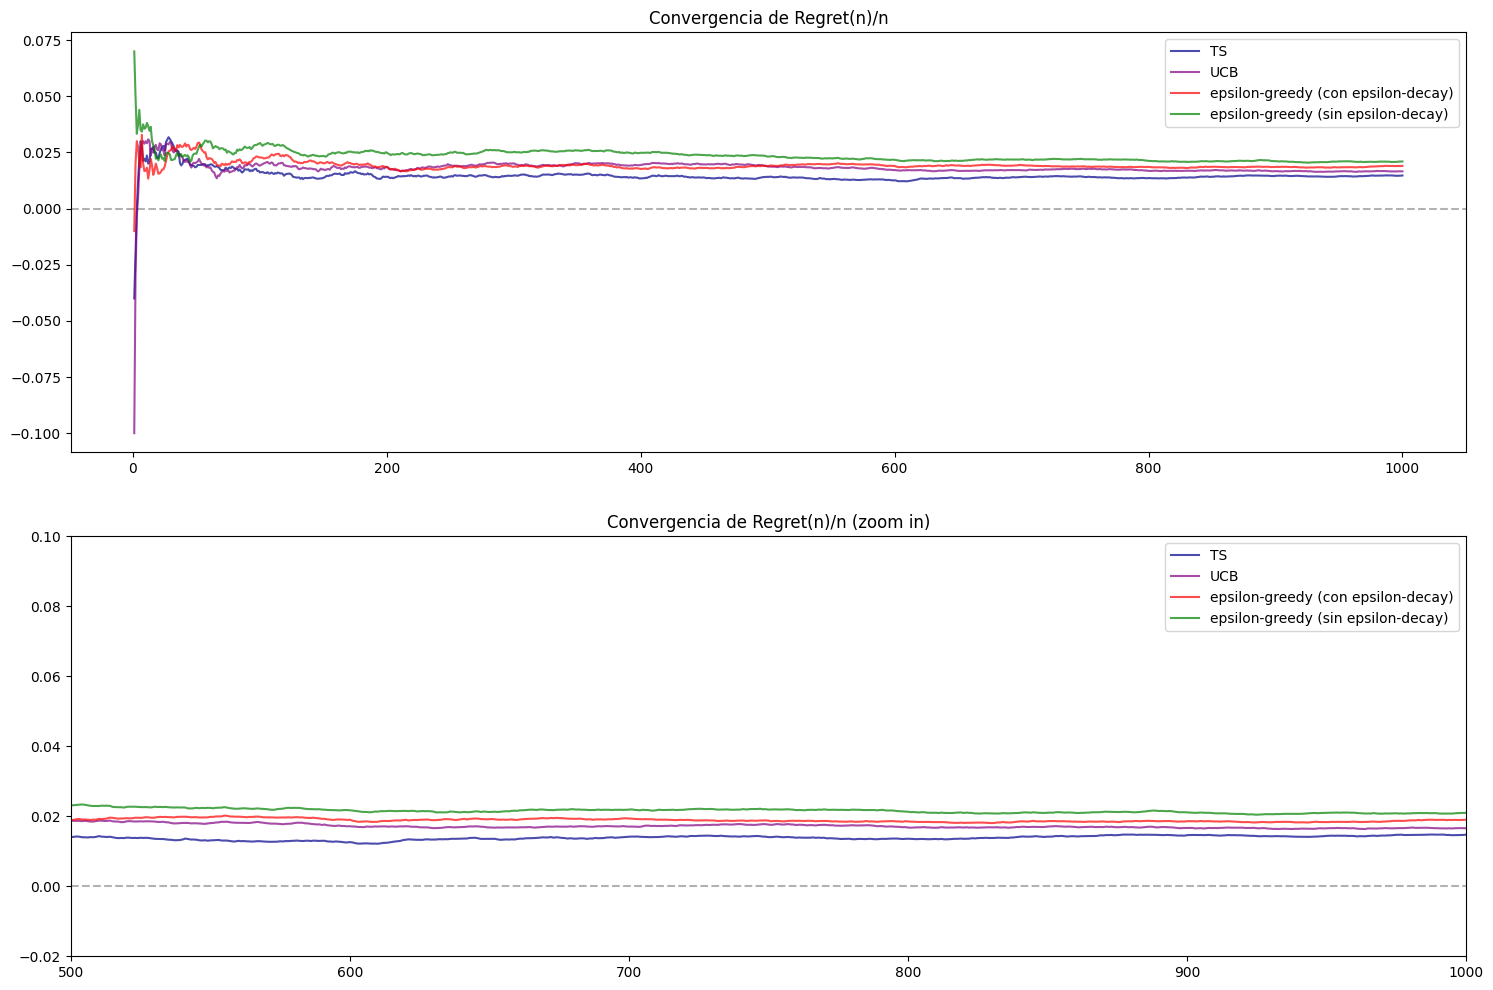

In [8]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

El siguiente gráfico no contradice lo ya expuesto ya que, al comprar la velocidad de crecimiento del Regret/n contra $\sqrt{n}$, vemos que todos los modelos crecen a un menor nivel, esto encuentra su razón en la cercanía de las probabilidades subyacentes (0.5, 0.52, 0.54), ya que se genera un contexto en<br>donde el regret por no jugar a la mejor opción es pequeño.<br>

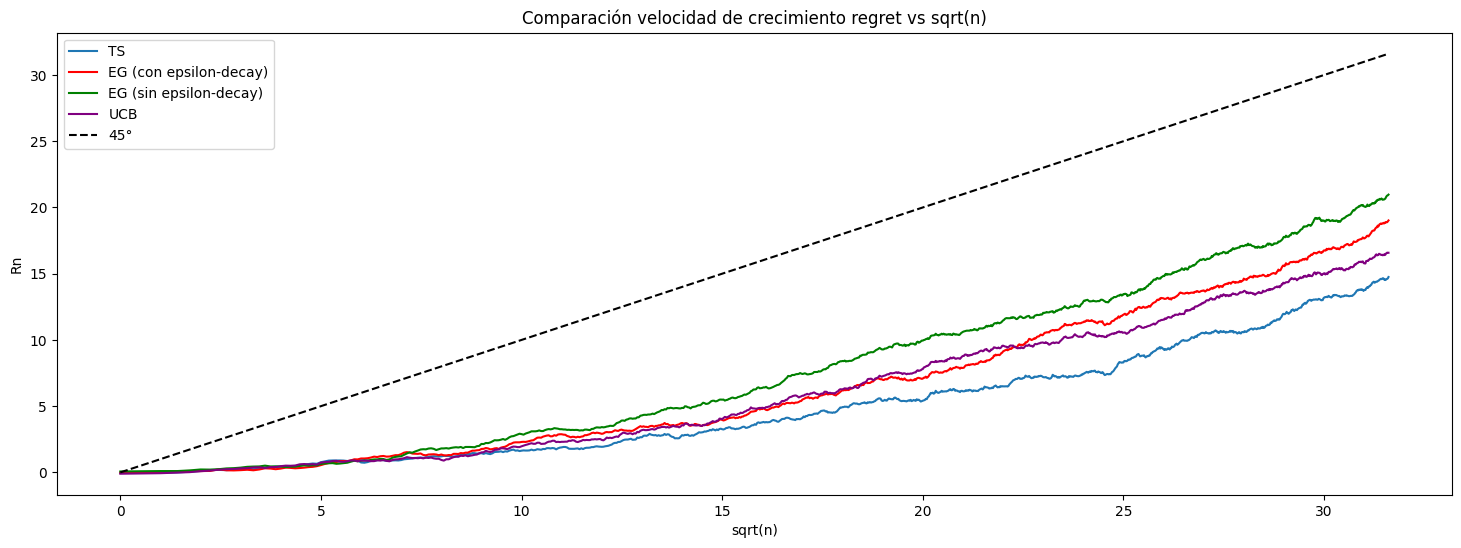

In [9]:
sl.plot_log_comparison()

### **Conclución caso 2**

Podríamos concluir en que, para casos en donde las probabilidades subyacentes (y los extremos) se encuentran extremádamente cerca, todos los modelos parecieran performar de una forma correcta, debido al bajo regret que genera elegir una máquina no óptima. Mas allá de esto, pareciera ser que **Thompson Sampling** resulta el mejor modelo a utilizar.

---

# Caso 3
En este caso tenemos 5 máquinas divididas en 2 grupos:
   * un grupo de 3 máquinas con probabilidades bajas similares **(p0=.26, p1=.25, p2=.29)**; y 
   * un grupo de 2 máquinas con probabilidades más altas a las del grupo anterior, pero cercanas entre si **(p3=.37, p4=.38)**<br><br>
   
Cabe destacar también que los estremos se encuentran separados entre si (p1=.25 y p4=.38).

In [10]:
sl = SimulationLab(
    actual_probs=[.26, .25, .29, .37, .38],
    repetitions=100,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


  1%|          | 1/100 [00:07<12:21,  7.49s/it]

Saving repetition 0...


  2%|▏         | 2/100 [00:14<12:05,  7.40s/it]

Saving repetition 1...


  3%|▎         | 3/100 [00:22<12:07,  7.50s/it]

Saving repetition 2...


  4%|▍         | 4/100 [00:30<12:06,  7.57s/it]

Saving repetition 3...


  5%|▌         | 5/100 [00:37<11:59,  7.57s/it]

Saving repetition 4...


  6%|▌         | 6/100 [00:45<11:53,  7.60s/it]

Saving repetition 5...


  7%|▋         | 7/100 [00:52<11:45,  7.59s/it]

Saving repetition 6...


  8%|▊         | 8/100 [01:00<11:40,  7.61s/it]

Saving repetition 7...


  9%|▉         | 9/100 [01:08<11:29,  7.58s/it]

Saving repetition 8...


 10%|█         | 10/100 [01:16<11:34,  7.72s/it]

Saving repetition 9...


 11%|█         | 11/100 [01:23<11:23,  7.68s/it]

Saving repetition 10...


 12%|█▏        | 12/100 [01:31<11:14,  7.66s/it]

Saving repetition 11...


 13%|█▎        | 13/100 [01:38<11:02,  7.62s/it]

Saving repetition 12...


 14%|█▍        | 14/100 [01:46<10:54,  7.61s/it]

Saving repetition 13...


 15%|█▌        | 15/100 [01:54<10:47,  7.62s/it]

Saving repetition 14...


 16%|█▌        | 16/100 [02:01<10:36,  7.57s/it]

Saving repetition 15...


 17%|█▋        | 17/100 [02:09<10:29,  7.58s/it]

Saving repetition 16...


 18%|█▊        | 18/100 [02:17<10:36,  7.76s/it]

Saving repetition 17...


 19%|█▉        | 19/100 [02:25<10:34,  7.83s/it]

Saving repetition 18...


 20%|██        | 20/100 [02:32<10:20,  7.75s/it]

Saving repetition 19...


 21%|██        | 21/100 [02:40<10:10,  7.73s/it]

Saving repetition 20...


 22%|██▏       | 22/100 [02:48<10:00,  7.70s/it]

Saving repetition 21...


 23%|██▎       | 23/100 [02:55<09:52,  7.70s/it]

Saving repetition 22...


 24%|██▍       | 24/100 [03:03<09:44,  7.70s/it]

Saving repetition 23...


 25%|██▌       | 25/100 [03:11<09:45,  7.80s/it]

Saving repetition 24...


 26%|██▌       | 26/100 [03:19<09:34,  7.76s/it]

Saving repetition 25...


 27%|██▋       | 27/100 [03:27<09:39,  7.94s/it]

Saving repetition 26...


 28%|██▊       | 28/100 [03:35<09:22,  7.82s/it]

Saving repetition 27...


 29%|██▉       | 29/100 [03:42<09:11,  7.76s/it]

Saving repetition 28...


 30%|███       | 30/100 [03:50<08:59,  7.71s/it]

Saving repetition 29...


 31%|███       | 31/100 [03:57<08:48,  7.67s/it]

Saving repetition 30...


 32%|███▏      | 32/100 [04:05<08:40,  7.65s/it]

Saving repetition 31...


 33%|███▎      | 33/100 [04:13<08:31,  7.64s/it]

Saving repetition 32...


 34%|███▍      | 34/100 [04:20<08:21,  7.60s/it]

Saving repetition 33...


 35%|███▌      | 35/100 [04:28<08:19,  7.69s/it]

Saving repetition 34...


 36%|███▌      | 36/100 [04:36<08:14,  7.72s/it]

Saving repetition 35...


 37%|███▋      | 37/100 [04:43<08:04,  7.69s/it]

Saving repetition 36...


 38%|███▊      | 38/100 [04:51<07:52,  7.63s/it]

Saving repetition 37...


 39%|███▉      | 39/100 [04:59<07:46,  7.65s/it]

Saving repetition 38...


 40%|████      | 40/100 [05:06<07:39,  7.65s/it]

Saving repetition 39...


 41%|████      | 41/100 [05:14<07:29,  7.61s/it]

Saving repetition 40...


 42%|████▏     | 42/100 [05:22<07:22,  7.64s/it]

Saving repetition 41...


 43%|████▎     | 43/100 [05:29<07:17,  7.68s/it]

Saving repetition 42...


 44%|████▍     | 44/100 [05:38<07:18,  7.84s/it]

Saving repetition 43...


 45%|████▌     | 45/100 [05:45<07:08,  7.80s/it]

Saving repetition 44...


 46%|████▌     | 46/100 [05:53<06:56,  7.72s/it]

Saving repetition 45...


 47%|████▋     | 47/100 [06:00<06:46,  7.67s/it]

Saving repetition 46...


 48%|████▊     | 48/100 [06:08<06:37,  7.65s/it]

Saving repetition 47...


 49%|████▉     | 49/100 [06:15<06:27,  7.60s/it]

Saving repetition 48...


 50%|█████     | 50/100 [06:23<06:20,  7.61s/it]

Saving repetition 49...


 51%|█████     | 51/100 [06:31<06:11,  7.59s/it]

Saving repetition 50...


 52%|█████▏    | 52/100 [06:38<06:06,  7.64s/it]

Saving repetition 51...


 53%|█████▎    | 53/100 [06:46<06:03,  7.73s/it]

Saving repetition 52...


 54%|█████▍    | 54/100 [06:54<05:53,  7.68s/it]

Saving repetition 53...


 55%|█████▌    | 55/100 [07:01<05:44,  7.65s/it]

Saving repetition 54...


 56%|█████▌    | 56/100 [07:09<05:35,  7.63s/it]

Saving repetition 55...


 57%|█████▋    | 57/100 [07:17<05:27,  7.62s/it]

Saving repetition 56...


 58%|█████▊    | 58/100 [07:24<05:19,  7.61s/it]

Saving repetition 57...


 59%|█████▉    | 59/100 [07:32<05:11,  7.59s/it]

Saving repetition 58...


 60%|██████    | 60/100 [07:39<05:02,  7.57s/it]

Saving repetition 59...


 61%|██████    | 61/100 [07:48<05:03,  7.78s/it]

Saving repetition 60...


 62%|██████▏   | 62/100 [07:55<04:53,  7.72s/it]

Saving repetition 61...


 63%|██████▎   | 63/100 [08:03<04:45,  7.71s/it]

Saving repetition 62...


 64%|██████▍   | 64/100 [08:10<04:37,  7.70s/it]

Saving repetition 63...


 65%|██████▌   | 65/100 [08:18<04:28,  7.66s/it]

Saving repetition 64...


 66%|██████▌   | 66/100 [08:26<04:20,  7.65s/it]

Saving repetition 65...


 67%|██████▋   | 67/100 [08:33<04:11,  7.61s/it]

Saving repetition 66...


 68%|██████▊   | 68/100 [08:41<04:06,  7.69s/it]

Saving repetition 67...


 69%|██████▉   | 69/100 [08:49<03:57,  7.65s/it]

Saving repetition 68...


 70%|███████   | 70/100 [08:57<03:55,  7.87s/it]

Saving repetition 69...


 71%|███████   | 71/100 [09:05<03:45,  7.78s/it]

Saving repetition 70...


 72%|███████▏  | 72/100 [09:12<03:37,  7.77s/it]

Saving repetition 71...


 73%|███████▎  | 73/100 [09:20<03:28,  7.71s/it]

Saving repetition 72...


 74%|███████▍  | 74/100 [09:27<03:19,  7.67s/it]

Saving repetition 73...


 75%|███████▌  | 75/100 [09:35<03:10,  7.61s/it]

Saving repetition 74...


 76%|███████▌  | 76/100 [09:43<03:02,  7.60s/it]

Saving repetition 75...


 77%|███████▋  | 77/100 [09:50<02:54,  7.59s/it]

Saving repetition 76...


 78%|███████▊  | 78/100 [09:58<02:49,  7.71s/it]

Saving repetition 77...


 79%|███████▉  | 79/100 [10:06<02:42,  7.72s/it]

Saving repetition 78...


 80%|████████  | 80/100 [10:13<02:34,  7.70s/it]

Saving repetition 79...


 81%|████████  | 81/100 [10:21<02:25,  7.65s/it]

Saving repetition 80...


 82%|████████▏ | 82/100 [10:29<02:16,  7.61s/it]

Saving repetition 81...


 83%|████████▎ | 83/100 [10:36<02:09,  7.61s/it]

Saving repetition 82...


 84%|████████▍ | 84/100 [10:44<02:01,  7.61s/it]

Saving repetition 83...


 85%|████████▌ | 85/100 [10:51<01:53,  7.59s/it]

Saving repetition 84...


 86%|████████▌ | 86/100 [11:00<01:49,  7.83s/it]

Saving repetition 85...


 87%|████████▋ | 87/100 [11:08<01:43,  7.96s/it]

Saving repetition 86...


 88%|████████▊ | 88/100 [11:16<01:34,  7.86s/it]

Saving repetition 87...


 89%|████████▉ | 89/100 [11:23<01:25,  7.77s/it]

Saving repetition 88...


 90%|█████████ | 90/100 [11:31<01:17,  7.71s/it]

Saving repetition 89...


 91%|█████████ | 91/100 [11:38<01:08,  7.66s/it]

Saving repetition 90...


 92%|█████████▏| 92/100 [11:46<01:01,  7.63s/it]

Saving repetition 91...


 93%|█████████▎| 93/100 [11:54<00:53,  7.69s/it]

Saving repetition 92...


 94%|█████████▍| 94/100 [12:01<00:45,  7.65s/it]

Saving repetition 93...


 95%|█████████▌| 95/100 [12:09<00:38,  7.72s/it]

Saving repetition 94...


 96%|█████████▌| 96/100 [12:17<00:31,  7.76s/it]

Saving repetition 95...


 97%|█████████▋| 97/100 [12:25<00:23,  7.72s/it]

Saving repetition 96...


 98%|█████████▊| 98/100 [12:32<00:15,  7.63s/it]

Saving repetition 97...


 99%|█████████▉| 99/100 [12:40<00:07,  7.62s/it]

Saving repetition 98...


100%|██████████| 100/100 [12:47<00:00,  7.68s/it]


Saving repetition 99...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:09<00:00,  2.46s/it]

Success!


### Selección de máquinas

* Para este caso se da la particularidad que **Thompson sampling** selecciona desde el comienzo las 2 máquinas que presentan una mayor probabilidad real (p3=.37, p4=.38), esto encuentra su razón en que ambos valores se encuentran muy cercanos.<br>
* En cuanto a los modelos de **e-greedy** vemos que, si bien ambos seleccionan la máquina óptima más veces que el resto de las mismas, esta selección no sobrepasa el 30% de las iteraciones, siendo su comportamiento demasiado exploratorio.<br>
* Por último, el modelo **UCB** también logra seleccionar la mayor cantidad de veces a la máquina óptima pero, al igual que los **e-greedy**, diverge más que el **Thompson sampling**.

In [11]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso3', sharing='public')

<div style="text-align: center;font-size: 14px;">
<i>egT = epsilon-greedy con epsilon-decay | egF = epsilon-greedy sin epsilon-decay</i>
</div>

### Regret(n)/n

Este análisis se condice con lo anteriormente expuesto, vemos claramente cómo **Thomspon sampling** es el modelo que más tiende al 0 a medida que n crece, siendo a partir de de la iteración n°30 el modelo con menor Rn/n

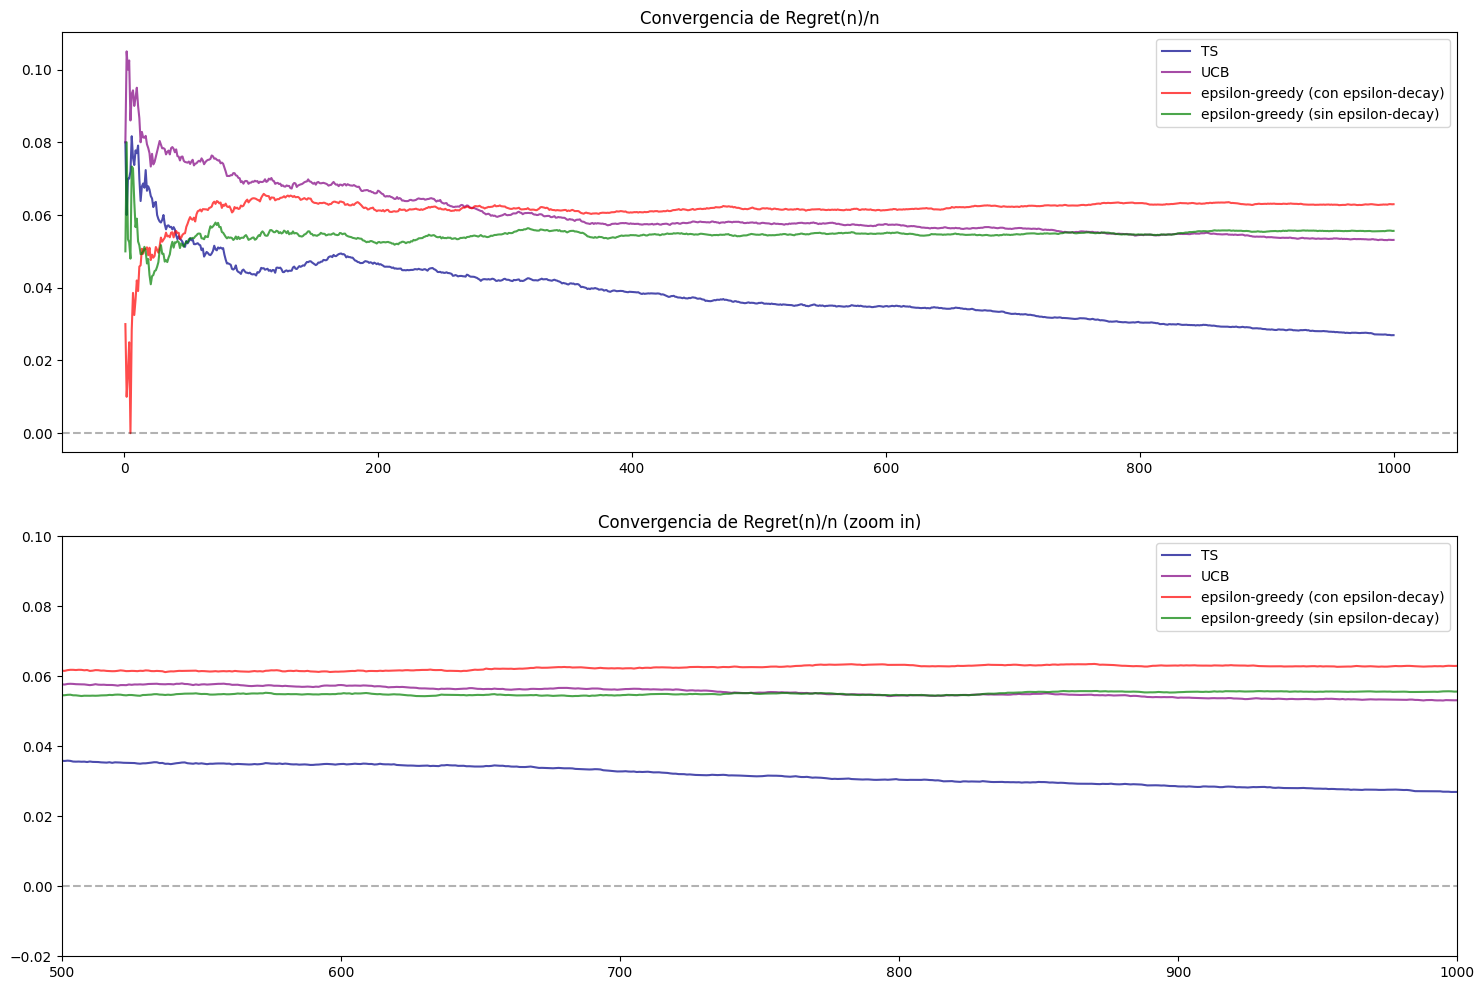

In [12]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

Al analizar la velocidad de crecimiento del Regret/n, vemos como el **Thompson sampling** es el único modelo que logra crecer a una tasa menor que $\sqrt{n}$ pasadas las 325 iteraciones.

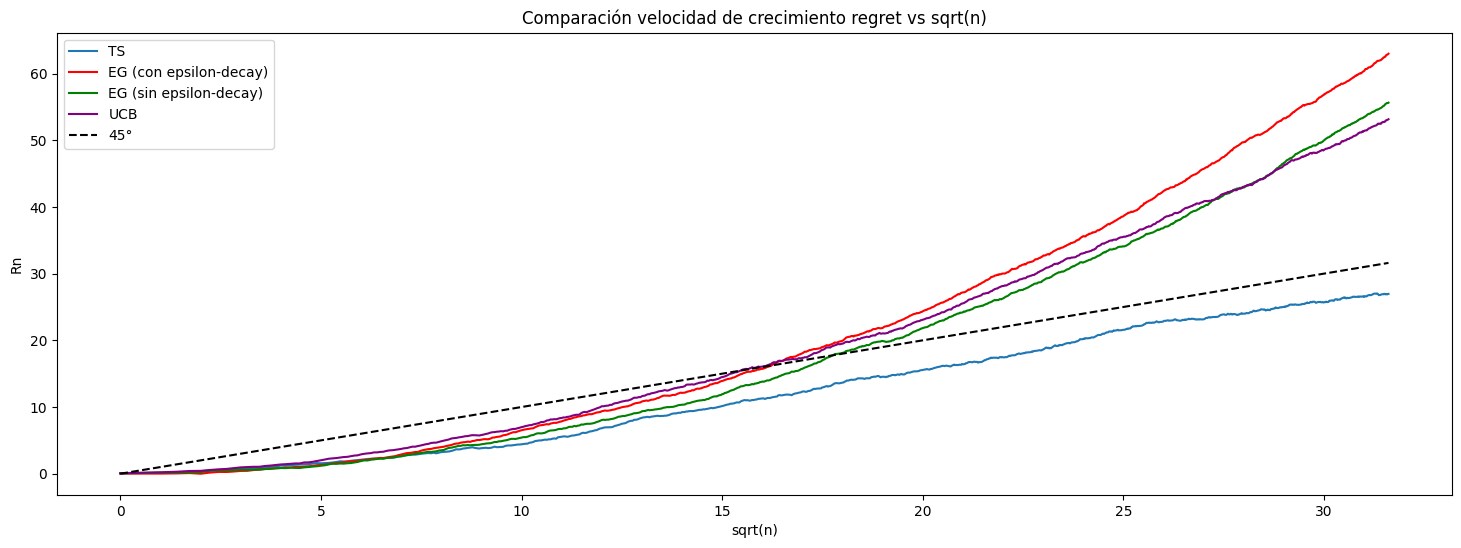

In [13]:
sl.plot_log_comparison()

### **Conclución caso 3**

Podríamos concluir en que, para casos en donde existen clusters de probabilidades subyacentes distanciados entre si pero cercanos internamente y con extremos alejados, **Thompson Sampling** resulta el mejor modelo a utilizar.<br>
Cabe destacar que este comportamiento se ve a partir de la iteración n°30, por lo que si se tienen menos posibilidades de prueba podría ser conveniente analizar utilizar algún modelo **e-greedy**.

---

# Caso 4
Este es el caso más complicado que presentamos, donde tenemos 10 máquinas con probabilidades cercanas entre si con extremos alejados <br>**(p0=.22, p1=.23, p2=.22, p3=.18, p4=.25, p5=.23, p6=.27, p7=.26, p8=.30, p9=.19)**

In [14]:
sl = SimulationLab(
    actual_probs=[.22, .23, .22, .18, .25, .23, .27, .26, .30, .19],
    repetitions=100,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


  1%|          | 1/100 [00:13<22:58, 13.92s/it]

Saving repetition 0...


  2%|▏         | 2/100 [00:27<22:45, 13.94s/it]

Saving repetition 1...


  3%|▎         | 3/100 [00:41<22:21, 13.83s/it]

Saving repetition 2...


  4%|▍         | 4/100 [00:55<22:01, 13.77s/it]

Saving repetition 3...


  5%|▌         | 5/100 [01:08<21:46, 13.76s/it]

Saving repetition 4...


  6%|▌         | 6/100 [01:23<21:47, 13.91s/it]

Saving repetition 5...


  7%|▋         | 7/100 [01:36<21:19, 13.76s/it]

Saving repetition 6...


  8%|▊         | 8/100 [01:50<21:00, 13.70s/it]

Saving repetition 7...


  9%|▉         | 9/100 [02:03<20:46, 13.70s/it]

Saving repetition 8...


 10%|█         | 10/100 [02:17<20:35, 13.73s/it]

Saving repetition 9...


 11%|█         | 11/100 [02:31<20:28, 13.81s/it]

Saving repetition 10...


 12%|█▏        | 12/100 [02:45<20:08, 13.73s/it]

Saving repetition 11...


 13%|█▎        | 13/100 [02:58<19:53, 13.72s/it]

Saving repetition 12...


 14%|█▍        | 14/100 [03:12<19:31, 13.62s/it]

Saving repetition 13...


 15%|█▌        | 15/100 [03:26<19:27, 13.74s/it]

Saving repetition 14...


 16%|█▌        | 16/100 [03:40<19:19, 13.81s/it]

Saving repetition 15...


 17%|█▋        | 17/100 [03:53<19:01, 13.75s/it]

Saving repetition 16...


 18%|█▊        | 18/100 [04:07<18:41, 13.67s/it]

Saving repetition 17...


 19%|█▉        | 19/100 [04:21<18:28, 13.69s/it]

Saving repetition 18...


 20%|██        | 20/100 [04:35<18:28, 13.85s/it]

Saving repetition 19...


 21%|██        | 21/100 [04:49<18:11, 13.82s/it]

Saving repetition 20...


 22%|██▏       | 22/100 [05:02<17:53, 13.77s/it]

Saving repetition 21...


 23%|██▎       | 23/100 [05:16<17:44, 13.83s/it]

Saving repetition 22...


 24%|██▍       | 24/100 [05:30<17:26, 13.77s/it]

Saving repetition 23...


 25%|██▌       | 25/100 [05:44<17:23, 13.92s/it]

Saving repetition 24...


 26%|██▌       | 26/100 [05:58<17:00, 13.79s/it]

Saving repetition 25...


 27%|██▋       | 27/100 [06:11<16:42, 13.73s/it]

Saving repetition 26...


 28%|██▊       | 28/100 [06:25<16:24, 13.68s/it]

Saving repetition 27...


 29%|██▉       | 29/100 [06:38<16:07, 13.63s/it]

Saving repetition 28...


 30%|███       | 30/100 [06:53<16:07, 13.83s/it]

Saving repetition 29...


 31%|███       | 31/100 [07:06<15:52, 13.80s/it]

Saving repetition 30...


 32%|███▏      | 32/100 [07:20<15:33, 13.73s/it]

Saving repetition 31...


 33%|███▎      | 33/100 [07:33<15:15, 13.67s/it]

Saving repetition 32...


 34%|███▍      | 34/100 [07:47<14:59, 13.62s/it]

Saving repetition 33...


 35%|███▌      | 35/100 [08:01<14:55, 13.78s/it]

Saving repetition 34...


 36%|███▌      | 36/100 [08:15<14:37, 13.71s/it]

Saving repetition 35...


 37%|███▋      | 37/100 [08:28<14:22, 13.68s/it]

Saving repetition 36...


 38%|███▊      | 38/100 [08:42<14:05, 13.64s/it]

Saving repetition 37...


 39%|███▉      | 39/100 [08:56<13:55, 13.69s/it]

Saving repetition 38...


 40%|████      | 40/100 [09:09<13:44, 13.74s/it]

Saving repetition 39...


 41%|████      | 41/100 [09:23<13:31, 13.75s/it]

Saving repetition 40...


 42%|████▏     | 42/100 [09:37<13:14, 13.69s/it]

Saving repetition 41...


 43%|████▎     | 43/100 [09:51<13:04, 13.76s/it]

Saving repetition 42...


 44%|████▍     | 44/100 [10:05<12:55, 13.84s/it]

Saving repetition 43...


 45%|████▌     | 45/100 [10:19<12:55, 14.10s/it]

Saving repetition 44...


 46%|████▌     | 46/100 [10:33<12:34, 13.98s/it]

Saving repetition 45...


 47%|████▋     | 47/100 [10:47<12:15, 13.88s/it]

Saving repetition 46...


 48%|████▊     | 48/100 [11:00<11:57, 13.81s/it]

Saving repetition 47...


 49%|████▉     | 49/100 [11:15<11:49, 13.92s/it]

Saving repetition 48...


 50%|█████     | 50/100 [11:28<11:30, 13.80s/it]

Saving repetition 49...


 51%|█████     | 51/100 [11:42<11:14, 13.76s/it]

Saving repetition 50...


 52%|█████▏    | 52/100 [11:55<10:57, 13.70s/it]

Saving repetition 51...


 53%|█████▎    | 53/100 [12:09<10:42, 13.67s/it]

Saving repetition 52...


 54%|█████▍    | 54/100 [12:23<10:37, 13.86s/it]

Saving repetition 53...


 55%|█████▌    | 55/100 [12:37<10:19, 13.77s/it]

Saving repetition 54...


 56%|█████▌    | 56/100 [12:50<10:03, 13.71s/it]

Saving repetition 55...


 57%|█████▋    | 57/100 [13:04<09:46, 13.65s/it]

Saving repetition 56...


 58%|█████▊    | 58/100 [13:17<09:32, 13.63s/it]

Saving repetition 57...


 59%|█████▉    | 59/100 [13:32<09:25, 13.80s/it]

Saving repetition 58...


 60%|██████    | 60/100 [13:45<09:12, 13.81s/it]

Saving repetition 59...


 61%|██████    | 61/100 [13:59<08:54, 13.70s/it]

Saving repetition 60...


 62%|██████▏   | 62/100 [14:13<08:39, 13.67s/it]

Saving repetition 61...


 63%|██████▎   | 63/100 [14:26<08:26, 13.70s/it]

Saving repetition 62...


 64%|██████▍   | 64/100 [14:40<08:16, 13.80s/it]

Saving repetition 63...


 65%|██████▌   | 65/100 [14:54<08:04, 13.84s/it]

Saving repetition 64...


 66%|██████▌   | 66/100 [15:08<07:47, 13.76s/it]

Saving repetition 65...


 67%|██████▋   | 67/100 [15:21<07:32, 13.71s/it]

Saving repetition 66...


 68%|██████▊   | 68/100 [15:36<07:23, 13.86s/it]

Saving repetition 67...


 69%|██████▉   | 69/100 [15:49<07:08, 13.81s/it]

Saving repetition 68...


 70%|███████   | 70/100 [16:03<06:51, 13.71s/it]

Saving repetition 69...


 71%|███████   | 71/100 [16:16<06:36, 13.67s/it]

Saving repetition 70...


 72%|███████▏  | 72/100 [16:30<06:21, 13.62s/it]

Saving repetition 71...


 73%|███████▎  | 73/100 [16:44<06:14, 13.86s/it]

Saving repetition 72...


 74%|███████▍  | 74/100 [16:58<05:59, 13.81s/it]

Saving repetition 73...


 75%|███████▌  | 75/100 [17:12<05:42, 13.72s/it]

Saving repetition 74...


 76%|███████▌  | 76/100 [17:25<05:28, 13.67s/it]

Saving repetition 75...


 77%|███████▋  | 77/100 [17:39<05:13, 13.63s/it]

Saving repetition 76...


 78%|███████▊  | 78/100 [17:53<05:04, 13.83s/it]

Saving repetition 77...


 79%|███████▉  | 79/100 [18:06<04:48, 13.74s/it]

Saving repetition 78...


 80%|████████  | 80/100 [18:20<04:33, 13.69s/it]

Saving repetition 79...


 81%|████████  | 81/100 [18:34<04:19, 13.65s/it]

Saving repetition 80...


 82%|████████▏ | 82/100 [18:47<04:05, 13.63s/it]

Saving repetition 81...


 83%|████████▎ | 83/100 [19:01<03:53, 13.76s/it]

Saving repetition 82...


 84%|████████▍ | 84/100 [19:15<03:39, 13.70s/it]

Saving repetition 83...


 85%|████████▌ | 85/100 [19:28<03:24, 13.65s/it]

Saving repetition 84...


 86%|████████▌ | 86/100 [19:42<03:10, 13.61s/it]

Saving repetition 85...


 87%|████████▋ | 87/100 [19:56<02:58, 13.73s/it]

Saving repetition 86...


 88%|████████▊ | 88/100 [20:10<02:46, 13.86s/it]

Saving repetition 87...


 89%|████████▉ | 89/100 [20:24<02:31, 13.79s/it]

Saving repetition 88...


 90%|█████████ | 90/100 [20:37<02:17, 13.71s/it]

Saving repetition 89...


 91%|█████████ | 91/100 [20:51<02:03, 13.70s/it]

Saving repetition 90...


 92%|█████████▏| 92/100 [21:05<01:50, 13.85s/it]

Saving repetition 91...


 93%|█████████▎| 93/100 [21:19<01:36, 13.80s/it]

Saving repetition 92...


 94%|█████████▍| 94/100 [21:32<01:22, 13.68s/it]

Saving repetition 93...


 95%|█████████▌| 95/100 [21:46<01:08, 13.71s/it]

Saving repetition 94...


 96%|█████████▌| 96/100 [21:59<00:54, 13.67s/it]

Saving repetition 95...


 97%|█████████▋| 97/100 [22:14<00:42, 14.01s/it]

Saving repetition 96...


 98%|█████████▊| 98/100 [22:29<00:28, 14.07s/it]

Saving repetition 97...


 99%|█████████▉| 99/100 [22:42<00:13, 13.96s/it]

Saving repetition 98...


100%|██████████| 100/100 [22:56<00:00, 13.77s/it]


Saving repetition 99...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:16<00:00,  4.14s/it]

Success!


### Selección de máquinas

* Resulta interesante observar como **Thompson sampling** y **e-greedy sin epsilon-decay** son los 2 modelos que mejor performan. Sin embargo cabe destacar una peculiaridad, si vemos cómo evolucionan a lo largo del tiempo, se detecta que, a medida que avanzan las iteraciones, **Thompson sampling** comienza a seleccionar más veces la máquina óptima (p8=.30), mientras que el **e-greedy** mantiene una proporcionalidad con las máquinas 5, 6 y 7 (p5=.23, p6=.27, p7=.26).<br>
* En cuanto al modelo de **UCB**, vemos que le cuesta encontrar alguna opción óptima y que su patron de selección se asemeja al de una selección al azar.

In [15]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso4', sharing='public')

<div style="text-align: center;font-size: 14px;">
<i>egT = epsilon-greedy con epsilon-decay | egF = epsilon-greedy sin epsilon-decay</i>
</div>

### Regret(n)/n

A priori observamos que el Regret(n) es mayor vs el de los casos anteriores, esto es por cómo seteamos este caso en particular, ya que es mucho más complejo y existe una mayor cantidad de opciones a elegir. Del gráfico además se destaca que el **Thompson sampling** es el modelo que presenta menores valores de regret, con una clara tendencia a decaer si n aumenta.

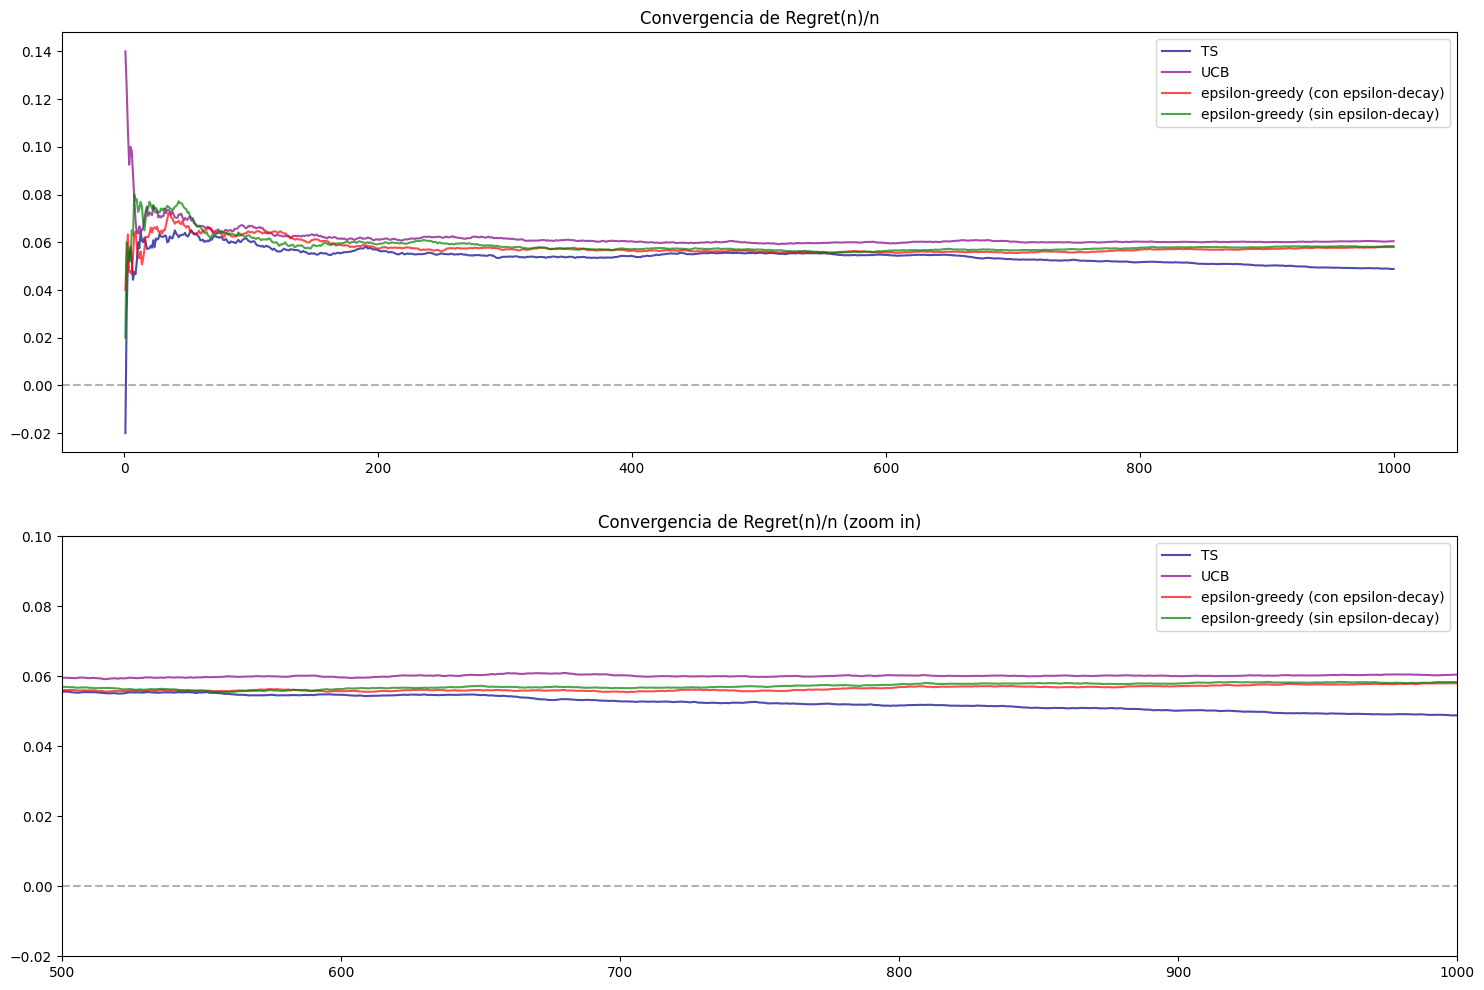

In [16]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

Por último, en nuestro análisis de velocidad de crecimiento del regret, vemos como todos los modelos crecen a una velocidad mayor que $\sqrt{n}$ pasadas las 325 iteraciones, pero **Thompson sampling** es el que lo hace a una tasa menor.

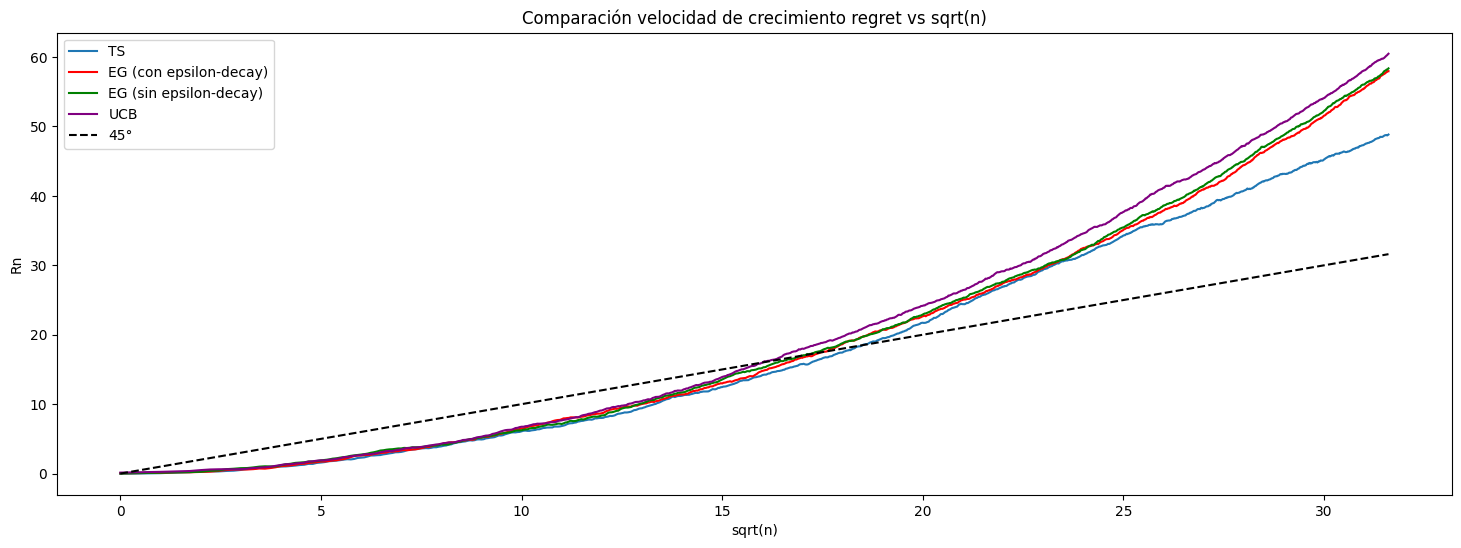

In [17]:
sl.plot_log_comparison()

### **Conclución caso 4**

Como ya se expuso anteriormente, este es el caso que presenta una mayor dificultad en su resolución, esto queda claro cuando vemos el gráfico de crecimiento del regret vs $\sqrt{n}$ donde ninguno de los modelos consigue mantenerse por debajo de esta velocidad, en otras palabras, los modelos pueden estar disminuyendo el valor de Regret(n)/n, pero a una tasa quizá más cercana a la lineal. Sin embargo, podemos concluír que, de los modelos probados, **Thompson Sampling** pareciera ser el mejor modelo a utilizar bajo este contexto.

<div style="text-align: center;font-size: 12px;">
<i>El código con el que fue generado este estudio se puede encontrar en <a link=https://github.com/ndominutti/thompson_sampling>https://github.com/ndominutti/thompson_sampling</a></i>
</div>